In [1]:
import cv2
import matplotlib.pyplot as plt



test Image Loading

In [2]:
def cv2img_via_plt_show(img):
    rgb  = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(rgb)
    plt.title('Image Display via Matplotlib')
    plt.axis('off')  
    plt.show()


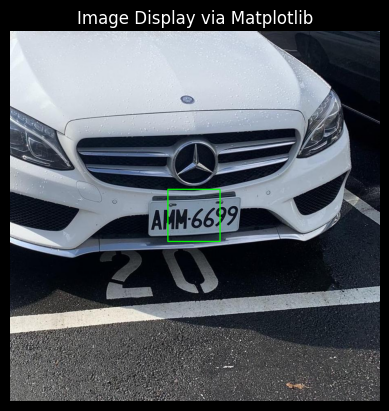

In [3]:
# Load Model Cascade Haar Feature Classifier
plate_cascade = cv2.CascadeClassifier("cascade.xml")
if plate_cascade.empty():
    print("無法載入 cascade.xml，請確認路徑正確")
    exit()

# img load
current_file_name = "test_image/03.jpg"
img = cv2.imread(current_file_name)
 

def obj_detect(img, file_name  ,show=True):

    car_plate_set = [] 


    dir_crop = "car_plate"
    img_copy = img.copy()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Gray Scale Processing to image

    # Multiple Haar Object Model Detect , Return the Capture coordination of  Car plate Haar Feature Detection result
    plates = plate_cascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(120, 60),
        maxSize=(400, 150),
    )

    

    for (x, y, w, h) in plates:
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cropped_img = img_copy[y:y+h, x:x+w]   # Extract and Crop sub image where is the car plate
        car_plate_set.append(cropped_img)
            

    if show:
        cv2img_via_plt_show(img_copy)

    return img_copy , car_plate_set


labeled_image , car_plate_set   =  obj_detect( img , current_file_name )
print('\n')

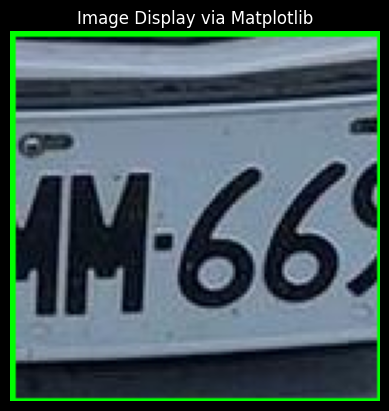

In [4]:
cv2img_via_plt_show(car_plate_set[0])